# **Practical No.:9**

# **Building a deep learning model for time series forecasting**

using https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [23]:
# Load the dataset (daily minimum temperatures)
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
url = "/content/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=['Date'])

In [24]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [25]:
data = df['Temp'].values

In [26]:
data

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [27]:
# Normalize data (mean 0, std 1)
mean = data.mean()
std = data.std()
data = (data - mean) / std

In [28]:
print(mean)
print(std)
print(data)

11.177753424657535
4.071279075310806
[2.33888328 1.65113873 1.87219948 ... 0.5703973  1.11076801 0.44758577]


In [29]:
# Prepare sequences for supervised learning
# Creating input sequences of 5 days to predict the next day

seq_length = 5
X, y = [], []
for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

X = np.array(X).reshape(-1, seq_length, 1)
y = np.array(y)

In [30]:
# Build Recurrent Neural Network model
model = Sequential([
    SimpleRNN(10, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam', loss='mse')

In [32]:
# Training the model
model.fit(X, y, epochs=100, verbose=0)

In [34]:
# To Predict the next day
y_temp_pred = model.predict(X)

# Prints the first 5 true value vs predicted
for true_value, y_temp_pred in zip(y[:5], y_temp_pred[:5]):
    print(f"True: {true_value * std + mean:.2f}, Predicted: {y_temp_pred[0] * std + mean:.2f}")

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
True: 15.80, Predicted: 15.49
True: 15.80, Predicted: 15.81
True: 17.40, Predicted: 15.85
True: 21.80, Predicted: 16.63
True: 20.00, Predicted: 19.06


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


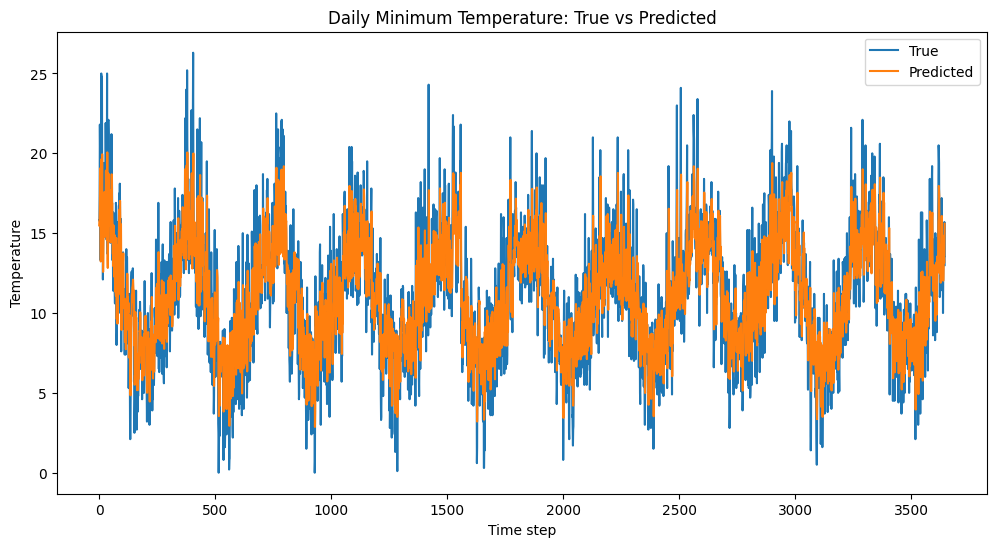

In [39]:
# Predict
temp_pred = model.predict(X)

# Denormalize predictions and true values
temp_pred_denorm = temp_pred * std + mean
y_denorm = y * std + mean

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_denorm, label='True')
plt.plot(temp_pred_denorm, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('Temperature')
plt.title('Daily Minimum Temperature: True vs Predicted')
plt.legend()
plt.show()